# Credit
This notebook was created by **Kishan Singh**.

Importing the required libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Reading the excel file

In [5]:
data = pd.read_csv("/content/Electric_Vehicle__Dataset.csv")
data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [6]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

Checking missing values

In [8]:
df = data.isnull().sum()
df

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


Removing any duplicate values

In [9]:
data.drop_duplicates()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Data Transform

In [25]:
data.rename(columns={
    "VIN (1-10)": "VIN",
    "County": "Country_Name",
    "City": "City_Name",
    "State": "State_Name",
    "Postal Code": "Postal_Code",
    "Model Year": "Model_Year",
    "Make": "Car_Brand",
    "Model": "Car_Model",
    "Electric Vehicle Type": "EV_Type",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility": "CAFV_Eligibility",
    "Electric Range": "EV_Range",
    "Base MSRP": "Base_MSRP",
    "Legislative District": "Legislative_District",
    "DOL Vehicle ID": "DOL_Vehicle_ID",
    "Vehicle Location": "Vehicle_Location",
    "Electric Utility": "Electric_Utility",
    "2020 Census Tract": "Census_Tract_2020"
}, inplace=True)

In [26]:
data.columns.tolist()

['VIN',
 'County_Name',
 'City_Name',
 'State_Name',
 'Postal_Code',
 'Model_Year',
 'Car_Brand',
 'Car_Model',
 'EV_Type',
 'CAFV_Eligibility',
 'EV_Range',
 'Base_MSRP',
 'Legislative_District',
 'DOL_Vehicle_ID',
 'Vehicle_Location',
 'Electric_Utility',
 'Census_Tract_2020']

Dropping Null values

In [27]:
data.dropna(axis=0,inplace=True)

In [28]:
data.isnull().sum()

,0
VIN,0
County_Name,0
City_Name,0
State_Name,0
Postal_Code,0
Model_Year,0
Car_Brand,0
Car_Model,0
EV_Type,0
CAFV_Eligibility,0


Data Visualizations

In [29]:
top_manufacturers = data['Car_Brand'].value_counts().head(5)
top_manufacturers

,count
Car_Brand,
TESLA,79471
NISSAN,13984
CHEVROLET,13651
FORD,9177
BMW,7556


<ipython-input-30-d7b3013a2e1d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")


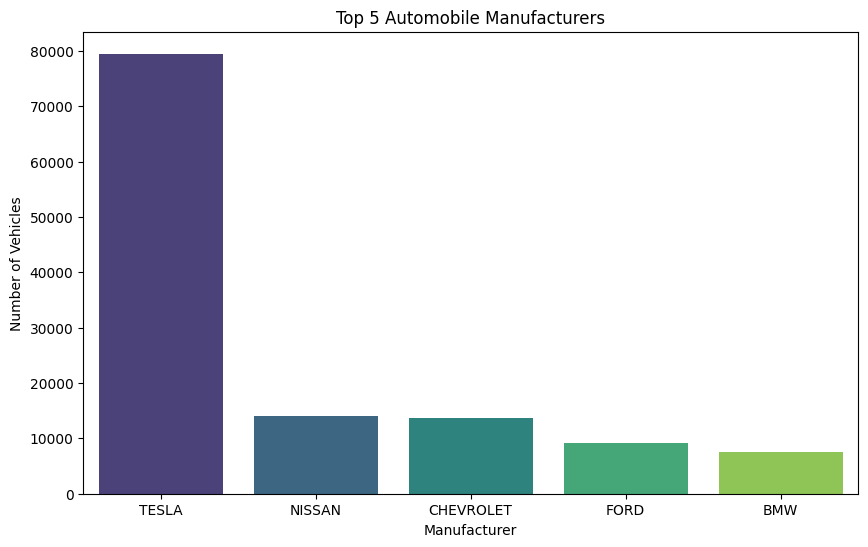

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manufacturers.index, y=top_manufacturers.values, palette="viridis")
plt.title("Top 5 Automobile Manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Vehicles")
plt.show()

In [31]:
Ev_type_distribution = data['EV_Type'].value_counts()
Ev_type_distribution

,count
EV_Type,
Battery Electric Vehicle (BEV),138947
Plug-in Hybrid Electric Vehicle (PHEV),38526


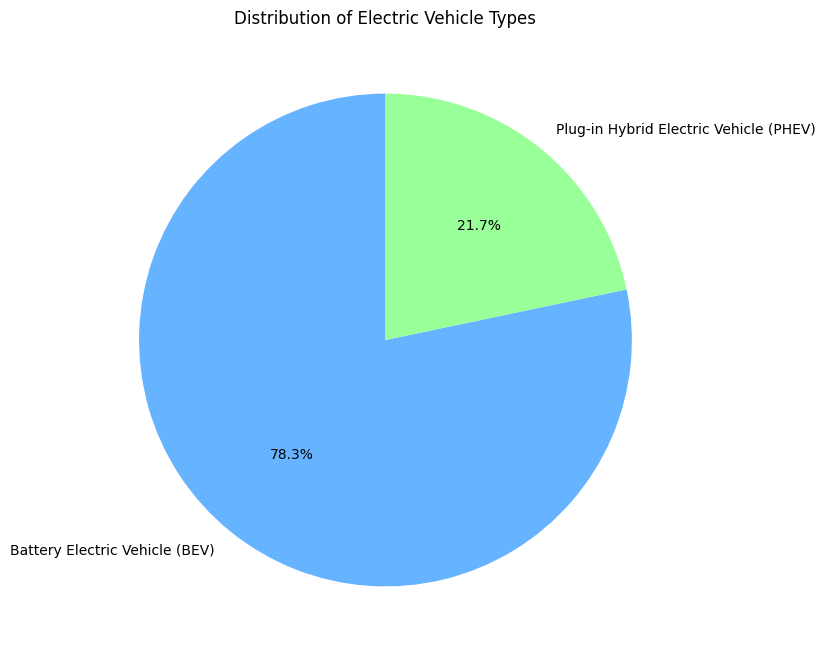

In [32]:
#Electric Vehicle Type Distribution
plt.figure(figsize=(8, 8))
Ev_type_distribution.plot.pie(autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title("Distribution of Electric Vehicle Types")
plt.ylabel("")
plt.show()

<ipython-input-33-19dd462b125c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Car_Brand'], y=data['EV_Range'], palette="coolwarm")


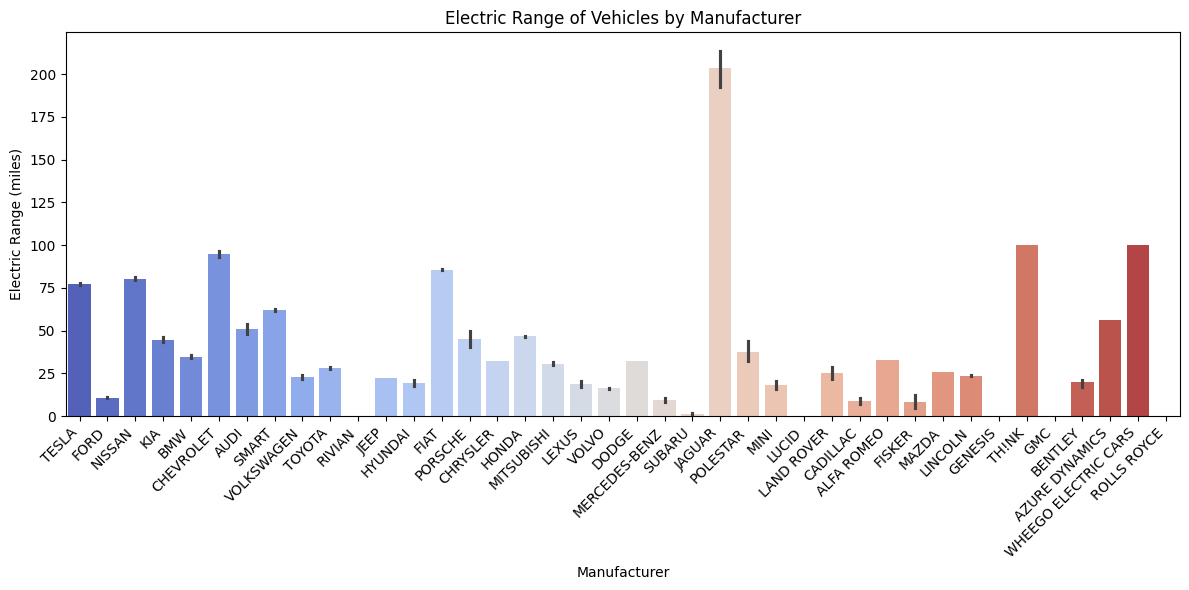

In [33]:
# Electric Range
plt.figure(figsize=(12, 6))
sns.barplot(x=data['Car_Brand'], y=data['EV_Range'], palette="coolwarm")
plt.title("Electric Range of Vehicles by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Electric Range (miles)")
plt.xticks(rotation=45, ha="right")
# Adjust plot layout for better spacing
plt.tight_layout()
plt.show()

<ipython-input-34-5a41b5de2f66>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Car_Brand'], y=data['Base_MSRP'], palette="cividis")


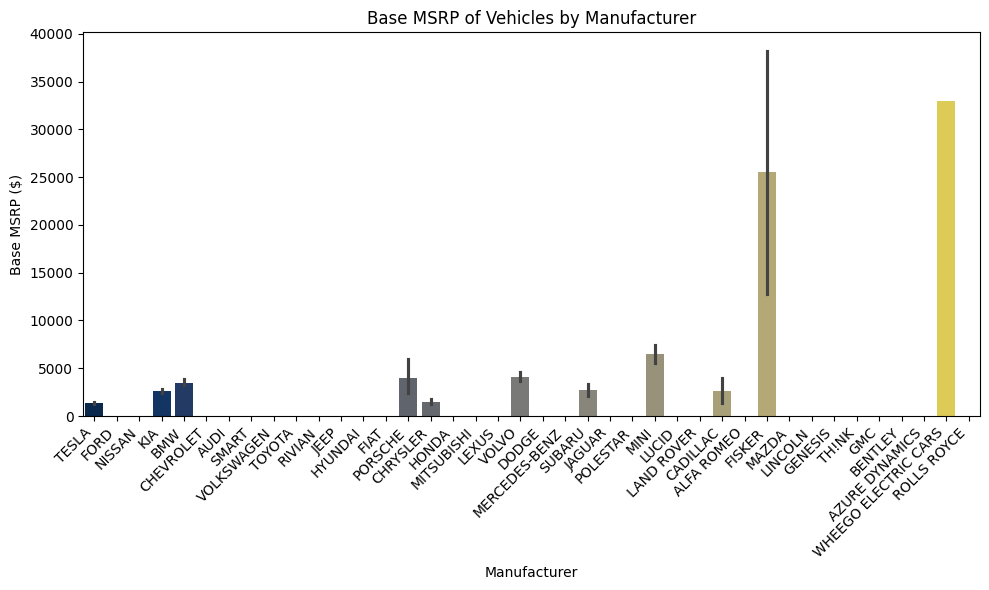

In [34]:
# Base MRP
plt.figure(figsize=(10, 6))
sns.barplot(x=data['Car_Brand'], y=data['Base_MSRP'], palette="cividis")
plt.title("Base MSRP of Vehicles by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Base MSRP ($)")
plt.xticks(rotation=45, ha="right")
# Adjust plot layout for better spacing
plt.tight_layout()
plt.show()

Top 10 Country that use electric vehicles the most

In [41]:
df_evs = data[data['EV_Type'] == 'Battery Electric Vehicle (BEV)']
ev_count = df_evs['County_Name'].value_counts().head(10)

<ipython-input-37-9668508b43d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_count.index, y=ev_count.values, palette="viridis")


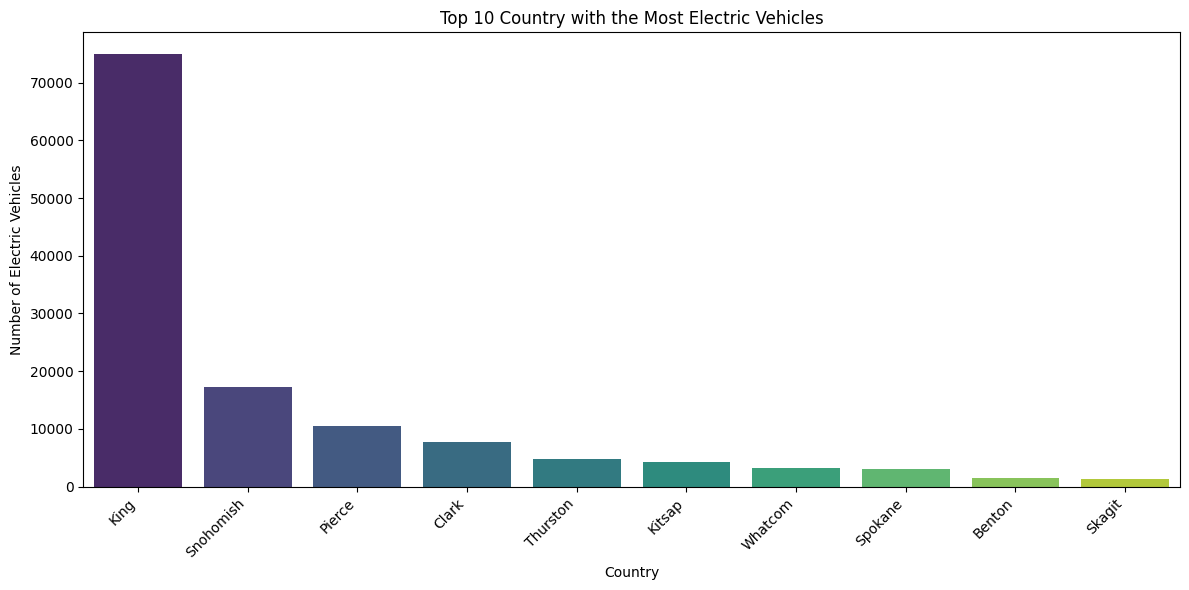

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ev_count.index, y=ev_count.values, palette="viridis")
plt.title("Top 10 Country with the Most Electric Vehicles")
plt.xlabel("Country")
plt.ylabel("Number of Electric Vehicles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Top 10 Most Used Models

In [49]:
Top_models = df_evs['Car_Model'].value_counts().head(10)
Top_models

,count
Car_Model,
MODEL Y,35921
MODEL 3,30009
LEAF,13352
MODEL S,7711
BOLT EV,6811
MODEL X,5784
ID.4,3928
MUSTANG MACH-E,3316
IONIQ 5,2432


<ipython-input-50-3d13ad3627b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_models.index, y=Top_models.values, palette="magma")


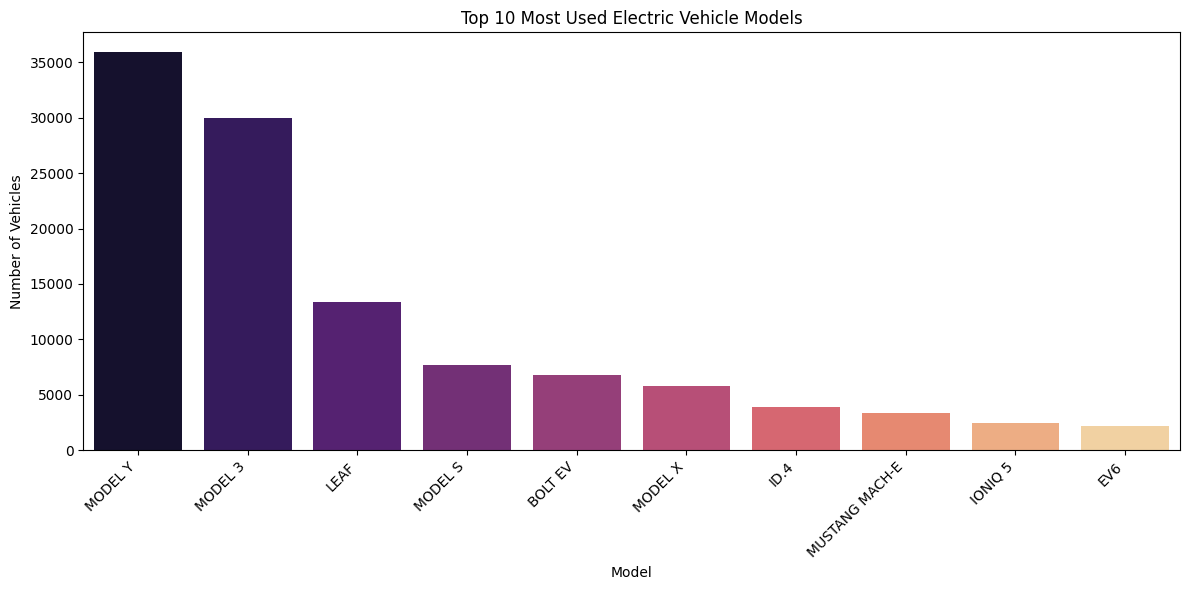

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(x=Top_models.index, y=Top_models.values, palette="magma")
plt.title("Top 10 Most Used Electric Vehicle Models")
plt.xlabel("Model")
plt.ylabel("Number of Vehicles")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Average Electric Range by Car Brand

In [51]:
avg_range_by_brand = data.groupby('Car_Brand')['EV_Range'].mean().sort_values(ascending=False)

<ipython-input-52-0bdf8b7afaab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_range_by_brand.index, y=avg_range_by_brand.values, palette="viridis")


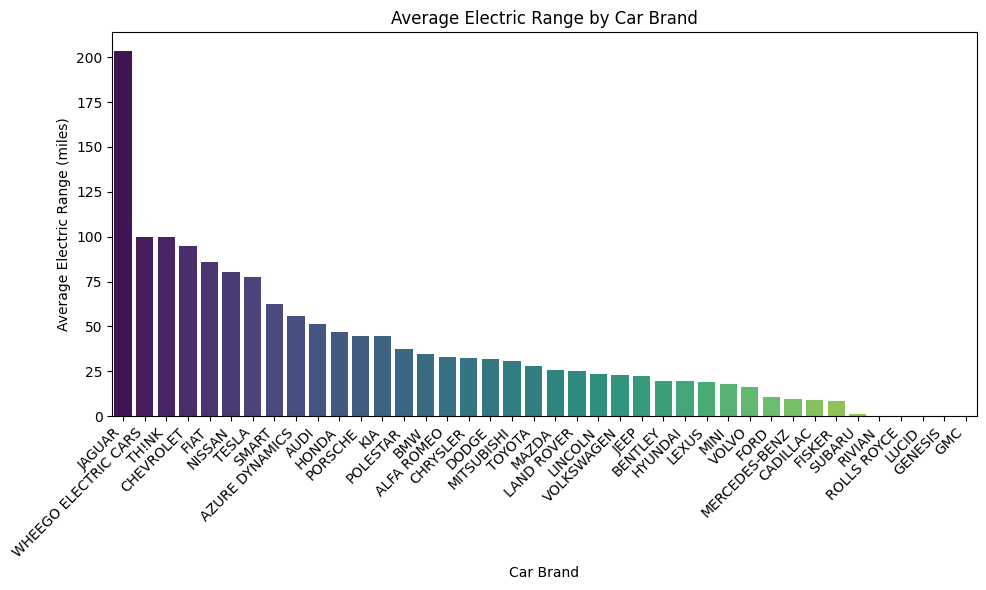

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_range_by_brand.index, y=avg_range_by_brand.values, palette="viridis")
plt.title("Average Electric Range by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Average Electric Range (miles)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Conclusion :**

***These insights can guide strategies for car manufacturers, especially in terms of targeting specific customer segments based on range, price, and model popularity.***